# ***` Logistic Regression `***

***` Import the Iris data which discusses about three species of flowers namely "Setosa","Verisicolor" and "Virginica" Your task is to build a logistic regression model to distinguish between two  of these speicies using features like "Sepal Length", "Sepal Width", "Petal Length" and "Petal Width"`***

`1)Write a sigmoid function and visualize the sigmoid function,by considering x in the range of (-10,10).`

`2)Plot impact of logloss for single forecasts (You can import log_loss from sklearn.metrics). Make predictions as 0 to 1 in 0.01 increments. (For example,yhat = [x*0.01 for x in range(0, 101)]).Evaluate predictions for a 0 true value.Plot a graph between y_hat and log_loss`

`3)Find the difference between minimum log loss for label 0 and label 1 [1.5 marks]`

`3)Import the Iris Data, and visualize the data to an idea about it.`

`4)Convert the char labels to numerical as logistic regression takes only 0's and 1's and then create new array of numerical labels.After following the procedure as mentioned in the comments , find the difference between means of sepal length of speices "Setosa"(label 0) and "Versicolor"(label 1).[1 marks]`

`5)Split the data in X,y and convert them into arrays`

`6)Use sklearn to split the data (**Important** Consider random_state=42 and test_size=0.2)and perform Logistic Regression`

`7)Find the weights and bias and save it in a list[5 marks]`

`8)Make a prediction on the test data.Find the accuracy of the prediction.[1 marks]`

`9)Also predict the species of the flower whose sepal length=4.9cm	sepal width=4cm	petal length=1.2cm	petal width=0.4cm and return the Species of the data.[1.5 marks]`


In [1]:
# Run this cell
# import important libraries library
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline
ans = [0]*5

# ***`Importing and Visualizing Data`***



In [2]:
#Sigmoid Function
#def sigmoid(x):
def sigmoid(x):
    y=1/(1+np.exp(-x))
    return y

Text(0.5, 1.0, 'Sigmoid function')

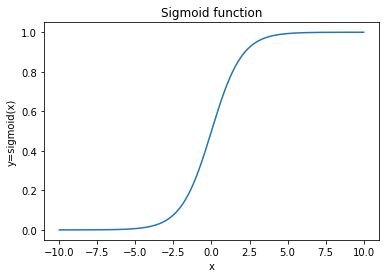

In [3]:
#Visualize sigmoid function
#Create an array of x_val with values between -10 and 10 
x_val=np.linspace(-10,10,num=1000)
#Find y_val, by using sigmoid function
y_val=sigmoid(x_val)
#Plot x_val,y_val and label the graph
plt.plot(x_val,y_val)
plt.xlabel("x")
plt.ylabel("y=sigmoid(x)")
plt.title("Sigmoid function")

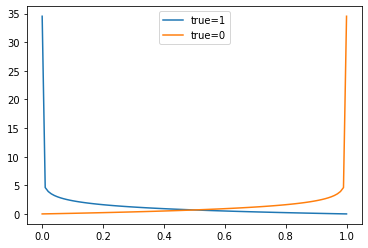

In [4]:
# Plot impact of logloss for single forecasts
from sklearn.metrics import log_loss
# predictions as 0 to 1 in 0.01 increments
y1=[x*0.01 for x in range(0, 101)]
# evaluate predictions for a 0 true value
loss0=[]
for x in y1:
    loss0.append(log_loss([0], [x], labels=[0,1]))
# evaluate predictions for a 1 true value
loss1=[]
for x in y1:
    loss1.append(log_loss([1], [x], labels=[0,1]))
# plot input to loss
plt.plot(y1, loss1, label='true=1')
plt.plot(y1, loss0, label='true=0')
plt.legend();

In [5]:
#Find the difference between minimum log loss for label 0 and label 1 
ans[0]=min(loss0)-min(loss1)

# ***`Processing the Data`***

In [6]:
#Import the dataset of iris from datasets.load_iris()
iris=datasets.load_iris()
iris_data=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_data['class']=iris.target

In [7]:
#Look into the top 5 rows of data
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


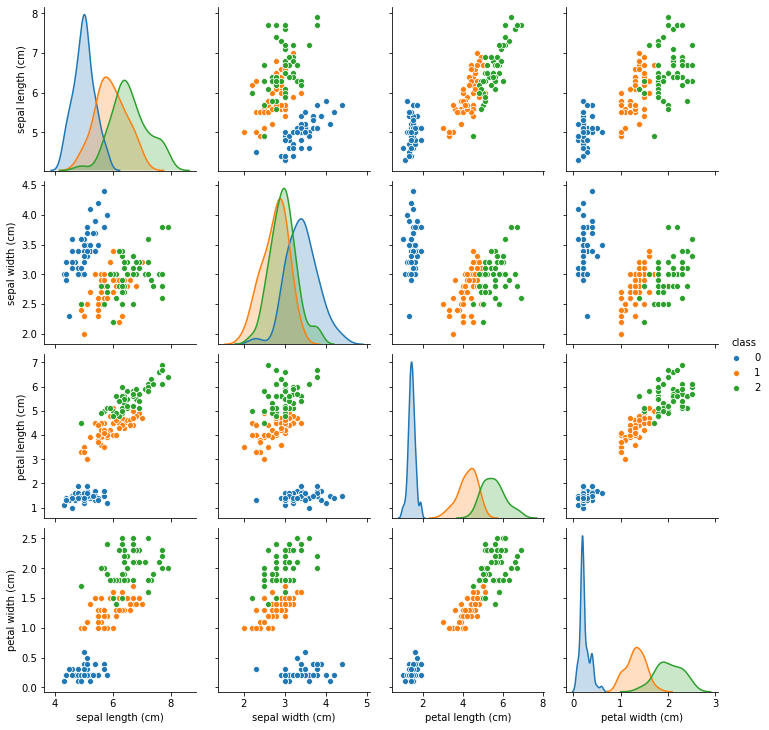

In [8]:
#Visualize  the data using seaborn pairplot
sns.pairplot(iris_data,hue='class');

In [9]:
# Convert char labels into numerical 
#import LabelEncoder which returns array of encoded labels
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
# Create new array of numerical labels
print(iris_data.dtypes)

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
class                  int32
dtype: object


In [10]:
# Drop old labels(char) data 
# Substitute new labels(numerical) into data
# Already encoded. 0 for setosa,1 for versicolor,2 for virginica

In [11]:
# Logistic regression only takes the data which has labels 0 and 1, so consider only data['labels']<2
# Considering Iris-setosa as "0" and Iris-versicolor as "1"
iris_data=iris_data[iris_data['class']<2]

In [12]:
#Find the difference between means of sepal length of speices "Setosa"(label 0) and "Versicolor"(label 1)
setosa_mean=iris_data[iris_data['class']==0]["sepal length (cm)"].mean()
versi_mean=iris_data[iris_data['class']==1]["sepal length (cm)"].mean()
ans[0]=abs(setosa_mean-versi_mean)

# ***`Obtaining Weight Values`***

In [13]:
# Split the data into X and y
X=iris_data.iloc[:,:-1]
y=iris_data.iloc[:,-1]

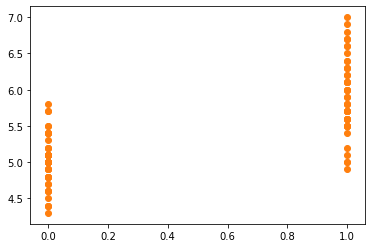

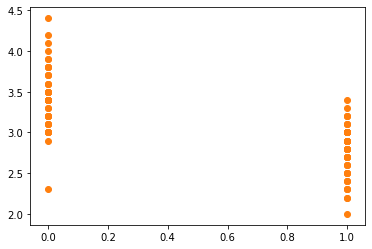

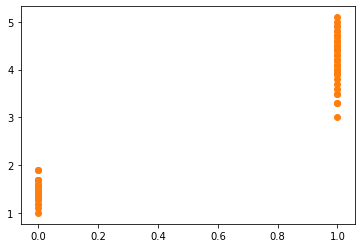

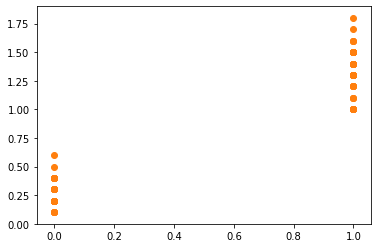

In [14]:
# Visualize X,y
for column in X:
    plt.figure()
    plt.scatter(y,X[column],c='#ff7f0e')

In [15]:
# Convert X,y into arrays
X_array=X.to_numpy()
y_array=y.to_numpy()

In [16]:
#Using sklearn to split the data
from sklearn.model_selection import train_test_split
#Take the test size as 0.2 and random_state as 42
X_train,X_test,y_train,y_test=train_test_split(X_array,y_array,test_size=0.2,random_state=42)

In [17]:
#Importing Necessary Libraries for Logistic Regression 
from sklearn.linear_model import LogisticRegression
#Building our model
clf=LogisticRegression(random_state=42)
clf=clf.fit(X_train,y_train)
#Finding the parameter and bias
para=clf.coef_
bias=clf.intercept_

In [18]:
#Printing the parameters and bias
print("Parameters: ",para)
print("Bias: ",bias)

Parameters:  [[ 0.45808171 -0.83895654  2.21684247  0.92362595]]
Bias:  [-6.526665]


In [19]:
#Save parameters and bias [w1,w2,w3,w4,b] as one vector 
#i.e if the answer should be in a 1 dimensional list
ans[2]=[0.45808171,-0.83895654,2.21684247,0.92362595,-6.526665]

In [20]:
#Predicitng on our test data
y_pred=clf.predict(X_test)

In [21]:
ans[3]=metrics.accuracy_score(y_test, y_pred)

In [22]:
#Predict for the input [4.9,4,1.2,0.4] , save the answer ans[4] "Setosa" or "Versicolor"
pred_ans=clf.predict([[4.9,4,1.2,0.4]])
print(pred_ans)

[0]


In [23]:
#The class of the input 
ans[4]="setosa"

In [24]:
import json
ans = [str(item) for item in ans]

filename = "umangpandey07@gmail.com_Umang_Pandey_LogisticRegression"

# Eg if your name is Saurav Joshi and email id is sauravjoshi123@gmail.com, filename becomes
# filename = sauravjoshi123@gmail.com_Saurav_Joshi_LogisticRegression

## Do not change anything below!!
- Make sure you have changed the above variable "filename" with the correct value. Do not change anything below!!

In [25]:
from importlib import import_module
import os
from pprint import pprint

findScore = import_module('findScore')
response = findScore.main(ans)
response['details'] = filename
with open(f'evaluation_{filename}.json', 'w') as outfile:
    json.dump(response, outfile)
pprint(response)

ModuleNotFoundError: No module named 'findScore'